In [1]:
pip install numpy

In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [16]:
#importing data
path="/content/train.csv"
data_train=pd.read_csv("/content/train.csv")
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [17]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [19]:
data_train.shape

(14999, 9)

In [20]:
#Assigning each category a number category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

In [21]:
#Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [26]:
#convert values to integers for views,likes,comments,dislikes and adview
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [22]:
column_vidid=data_train['vidid']

In [24]:
#Encoding features like Category,Duration,vidid

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [25]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [28]:
#convert time_in_sec for duration
import datetime
import time

In [37]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    p=['H','M','S']
    for i in y:
        if i not in p:
           mm+=i
        else:
           if(i=="H"):
                h=mm
                mm=''
           elif(i=="M"):
                 m=mm
    else:
                 s=mm
                 mm=''
    if(h==''):
          h='00'
    if(m==''):
          m='00'
    if(s==''):
          s='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv("/content/train.csv")
mp=pd.read_csv("/content/train.csv")["duration"]
time=mp.apply(checki)

In [38]:
def func_sec(time_string):
  h,m,s=time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [39]:
time1=time.apply(func_sec)

In [40]:
data_train["duration"]=time1

In [41]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,1157,6
1,2741,2,1707,56,2,6,2185,1470,4
2,8138,1,2023,25,0,2,2094,336,3
3,9005,6,620860,777,161,153,2119,662,8
4,122,1,666,1,0,0,2091,31,4


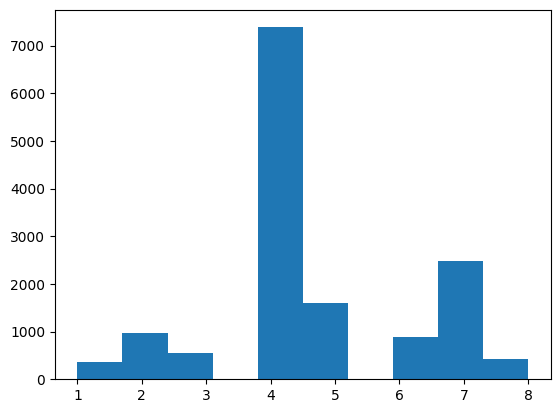

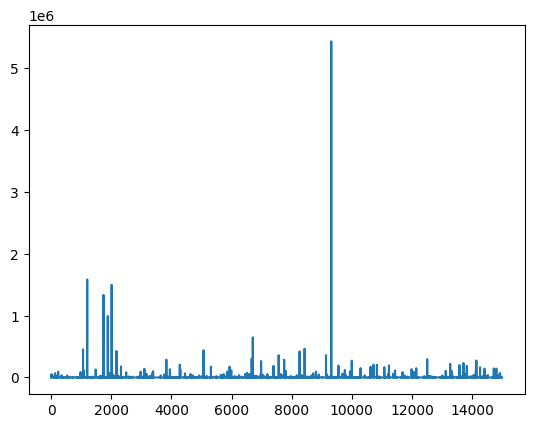

In [42]:
#visualization
      #individual plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [43]:
#Remove videos with adview greater than 2000000 as outlier
data_train=data_train[data_train["adview"] < 2000000]

In [49]:
pip install seaborn

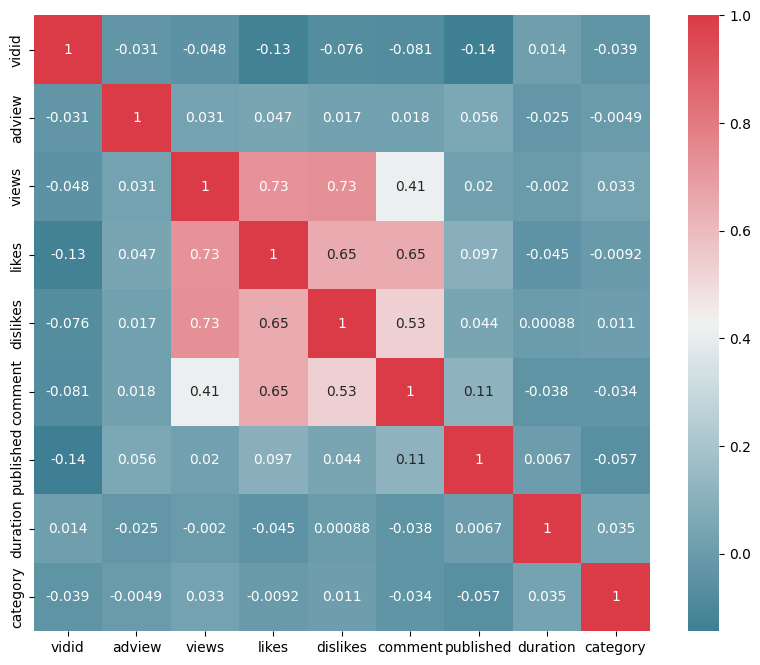

In [53]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), # Use bool instead of np.bool
square=True, ax=ax,annot=True)
plt.show()

In [63]:
pip install scikit-learn

In [65]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
# Check if 'vidid' column exists before dropping
if 'vidid' in data_train.columns:
    data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(11708, 7)

In [66]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [67]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [68]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1439.1521541471386
Mean Squared Error: 26304869.43085789
Root Mean Squared Error: 5128.82729586968


In [70]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 1452.151980874317
Mean Squared Error: 29468281.518784154
Root Mean Squared Error: 5428.469537428036


In [71]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)


<ipython-input-71-a0a554be36a4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 1386.9473226188416
Mean Squared Error: 20048000.783040646
Root Mean Squared Error: 4477.499389507569


In [72]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1439.1521541471386
Mean Squared Error: 26304869.43085789
Root Mean Squared Error: 5128.82729586968


In [73]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 83938992.0000 - mean_squared_error: 83938992.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 83695224.0000 - mean_squared_error: 83695224.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 83017024.0000 - mean_squared_error: 83017024.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 81840280.0000 - mean_squared_error: 81840280.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 80326216.0000 - mean_squared_error: 80326216.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 78742976.0000 - mean_squared_error: 78742976.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 77413720.0000 - mean_squared_error: 77413720.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 76476472.0000 - mean_squared_error: 76476472.0000


In [74]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [75]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
